In [14]:
import pandas as pd
import numpy as np
from sklearn import tree, ensemble, linear_model, \
preprocessing, model_selection, pipeline, metrics

import matplotlib.pyplot as plt

import seaborn as sns

pd.options.display.max_columns = 1000

from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions

%matplotlib inline

In [2]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
features = ["SepalLengthCm", "PetalLengthCm"]

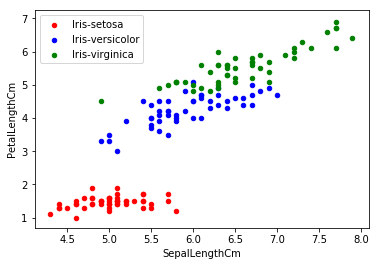

In [10]:
fig, ax = plt.subplots()

colors = ["red", "blue", "green"]

for i, v in enumerate(np.unique(df.Species)):
    df[df.Species == v].plot.scatter(features[0], features[1], label = v, color = colors[i], ax = ax)

Accuracy: train: 1.000000, test: 0.977778


Text(0,0.5,'PetalLengthCm')

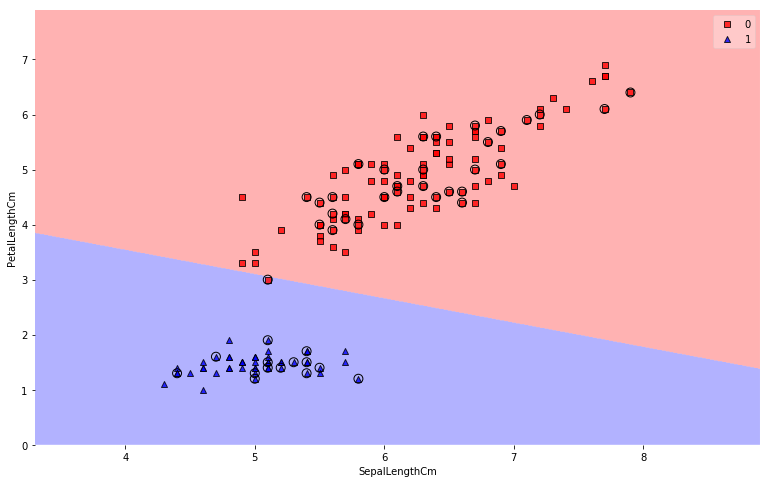

In [22]:
y = np.where(df.Species == "Iris-setosa", 1, 0)
X = df[features]
columns = X.columns
X = X.values.astype(np.float32)

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy: train: %f, test: %f" % (train_accuracy, test_accuracy))

plt.figure(figsize = (13, 8))
plot_decision_regions(X, y, pipe, X_highlight = X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])


baseline:
 0    0.6
1    0.4
dtype: float64
Accuracy: train: 0.942857, test: 0.955556


Text(0,0.5,'PetalLengthCm')

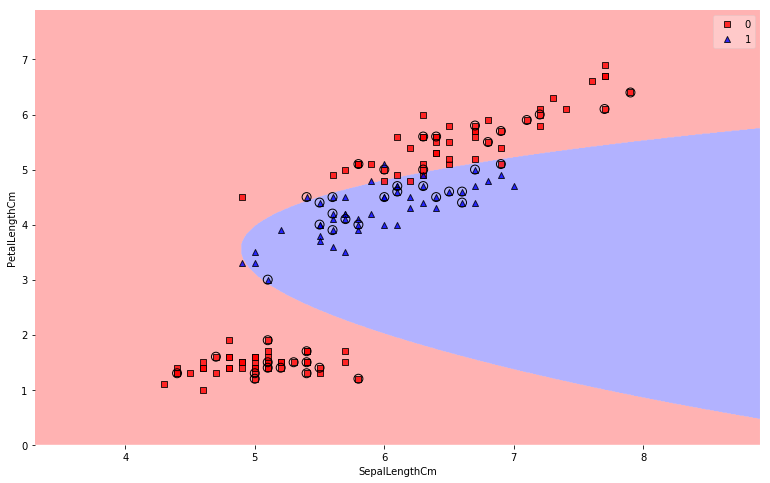

In [30]:
y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features]
columns = X.columns
X = X.values.astype(np.float32)

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

print("baseline:\n", (pd.Series(y_test).value_counts()/len(y_test)))
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=4, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy: train: %f, test: %f" % (train_accuracy, test_accuracy))

plt.figure(figsize = (13, 8))
plot_decision_regions(X, y, pipe, X_highlight = X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])


baseline:
 0    0.6
1    0.4
dtype: float64
Accuracy: train: 0.942857, test: 0.977778


Text(0,0.5,'PetalLengthCm')

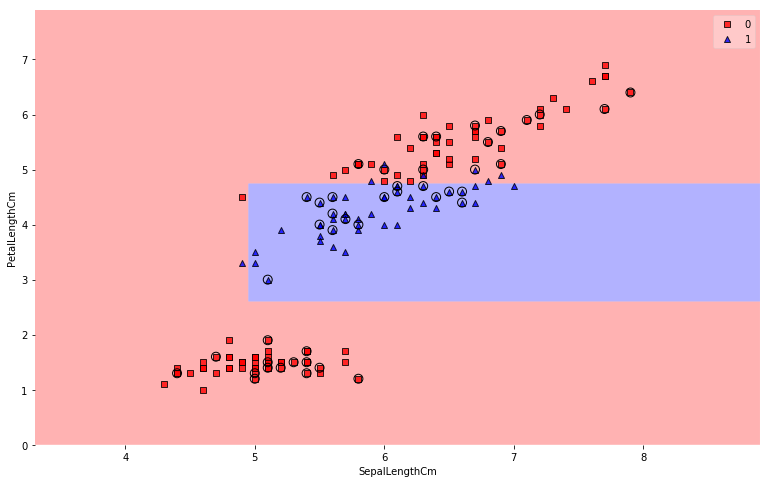

In [31]:
y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features]
columns = X.columns
X = X.values.astype(np.float32)

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

print("baseline:\n", (pd.Series(y_test).value_counts()/len(y_test)))
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=4, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=3))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy: train: %f, test: %f" % (train_accuracy, test_accuracy))

plt.figure(figsize = (13, 8))
plot_decision_regions(X, y, pipe, X_highlight = X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])


baseline:
 0    0.6
1    0.4
dtype: float64
Accuracy: train: 0.952381, test: 0.977778


Text(0,0.5,'PetalLengthCm')

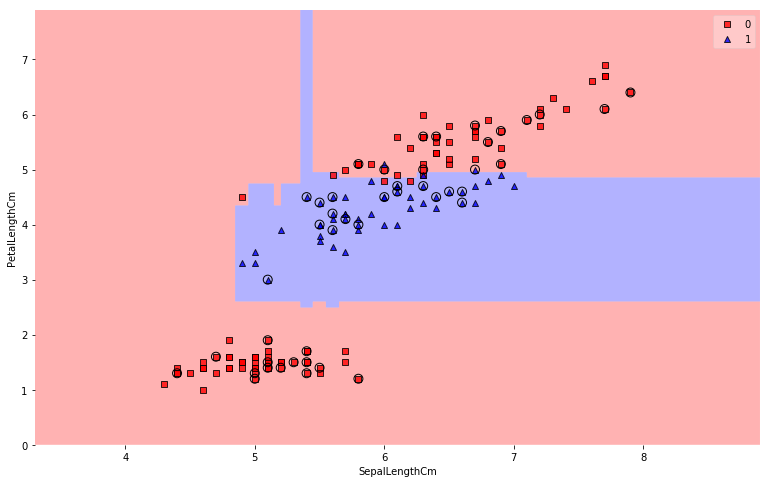

In [32]:
y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features]
columns = X.columns
X = X.values.astype(np.float32)

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

print("baseline:\n", (pd.Series(y_test).value_counts()/len(y_test)))
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=4, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(max_depth=3))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy: train: %f, test: %f" % (train_accuracy, test_accuracy))

plt.figure(figsize = (13, 8))
plot_decision_regions(X, y, pipe, X_highlight = X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])


In [33]:
from sklearn import neighbors

baseline:
 0    0.6
1    0.4
dtype: float64
Accuracy: train: 0.961905, test: 0.977778


Text(0,0.5,'PetalLengthCm')

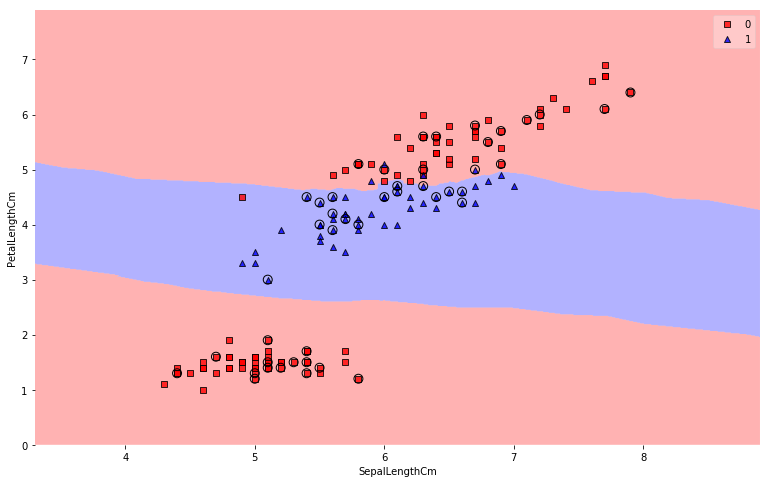

In [36]:
y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features]
columns = X.columns
X = X.values.astype(np.float32)

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

print("baseline:\n", (pd.Series(y_test).value_counts()/len(y_test)))
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=4, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", neighbors.KNeighborsClassifier(n_neighbors=10))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy: train: %f, test: %f" % (train_accuracy, test_accuracy))

plt.figure(figsize = (13, 8))
plot_decision_regions(X, y, pipe, X_highlight = X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])


In [37]:
from sklearn import svm

baseline:
 0    0.6
1    0.4
dtype: float64
Accuracy: train: 0.971429, test: 0.977778


Text(0,0.5,'PetalLengthCm')

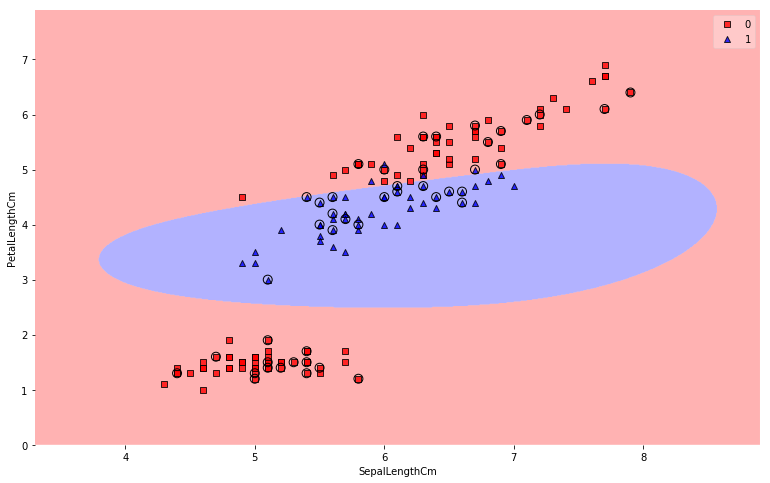

In [38]:
y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features]
columns = X.columns
X = X.values.astype(np.float32)

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

print("baseline:\n", (pd.Series(y_test).value_counts()/len(y_test)))
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=4, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", svm.SVC())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy: train: %f, test: %f" % (train_accuracy, test_accuracy))

plt.figure(figsize = (13, 8))
plot_decision_regions(X, y, pipe, X_highlight = X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])
